In [17]:
import random
import math
import io
import cairocffi as cairo
from scipy.ndimage import imread
from matplotlib.image import imsave
from scipy.misc import imresize
import matplotlib.pyplot as plt
import numpy as np
import tarfile
import gzip

from PIL import Image
%matplotlib inline

f = open("data/k1001.txt")
ko_chset = f.read().splitlines()
print("loaded %d characters" % len(ko_chset))

en_chset = []
en_chset.extend(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
en_chset.extend(["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n",\
              "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"])
en_chset.extend(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N",\
              "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"])
en_chset.extend(["(", ")", "'", "\"", ".", ",", ":", ";", "!", "?", "/", "@", "#", "$",\
              "%", "^", "&", "*", "[", "]", "{", "}", "<", ">", "~", "-", "_", "「", "」", "『", "』",
                "《", "》", "·"])

all_chset = ko_chset + en_chset

fonts = ["NanumMyeongjo", "NanumGothic", "Gungsuh", "Batang", "Dotum", "SM SSMyungJo Std", "Gulim",
         "NanumGothicCoding"]
weights = ["NORMAL", "BOLD"]

def get_random_ch(chset=all_chset):
    return chset[random.randrange(0,len(chset))]

loaded 2350 characters


In [18]:
WIDTH, HEIGHT = 96, 96
surface = cairo.ImageSurface (cairo.FORMAT_RGB24, WIDTH, HEIGHT)
ctx = cairo.Context (surface)
ctx.set_font_size(45)

def get_text_dim(text):
    extent = ctx.text_extents(text)
    xbearing, ybearing, width, height, xadvance, yadvance = extent
    return width, height

def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        print ("Not RGB!")
        return rgb

# Generate 64 X 64 image
def generate_mat(target, font, weight="NORMAL"):
    
    if weight == "BOLD":
        weight = cairo.FONT_WEIGHT_BOLD
    else:
        weight = cairo.FONT_WEIGHT_NORMAL
    
    w, h = get_text_dim(target)
    if h < 40:
        h = 40
    
    ctx.set_source_rgb(1, 1, 1)
    ctx.paint()
    ctx.set_source_rgb(0, 0, 0)
    ctx.select_font_face(font, cairo.FONT_SLANT_NORMAL,
            weight)
    
    x = 48 - (w/2)
    y = 85 - (h/2)
    
    if target == 'j' or target == 'g' or target == 'p' or target == 'q' or target == 'y':
        y -= 4
        
    if target == "《" and font != "SM SSMyungJo Std" and font != "NanumGothic":
        x -= 20
        if font == "NanumGothicCoding":
            x += 10
        
    if target == "》" and font == "NanumGothicCoding":
        x -= 10
        
    if target == "『" and font != "SM SSMyungJo Std" and font != "NanumGothic" and font != "NanumGothicCoding":
        x -= 20
        
    if target == "「" and font != "NanumGothic":
        x -= 20
        if font == "NanumGothicCoding":
            x += 10
    
    ctx.move_to(x, y)
    ctx.show_text(target)

    fb = io.BytesIO()
    surface.write_to_png (fb)
    new_mat = imread(fb)
    fb.close()
    
    return rgb2gray(new_mat)

def get_mat(target, font=None, weight=None):
    global mat
    
    if font is None:
        font = random.choice(fonts)
        
    if weight is None:
        weight = random.choice(weights)
        
    if font == "Gungsuh" and weight == "BOLD":
        weight = "NORMAL"
        
    if font == "SM SSMyungJo Std" or font == "NanumGothicCoding" and target =="·":
        font = "NanumMyeongjo"
    
    if not font in mat :
        mat[font] = dict()
    
    if not weight in mat[font] :
        mat[font][weight] = dict()
        
    if target in mat[font][weight] :
        return mat[font][weight][target]
    
    mat[font][weight][target] = generate_mat(target, font, weight)
    return mat[font][weight][target]

# Slice a target character from 96 X 96
# with sizing and etc.
def slice_img(mat):
    # offset range are set with subtle reason
    
    scale_factor = random.randrange(52, 70)
    x_offset = random.uniform(-4, 4)
    x_start = round(48 - scale_factor / 2 + x_offset)
    x_offset = random.uniform(-4, 4)
    x_end = round(48 + scale_factor / 2 + x_offset)
    y_offset = random.uniform(-3, 3)
    y_start = round(48 - scale_factor / 2 + y_offset)
    y_offset = random.uniform(-3, 3)
    y_end = round(48 + scale_factor / 2 + y_offset)
    sliced = mat[y_start:y_end, x_start:x_end]
    return imresize(sliced, [32, 32])

# Helper function to draw 3 X 3 plots
def draw_subplot(array, w, h):
    plt.figure(num=None, figsize=(3, 3), facecolor='w', edgecolor='k')
    for i in range(len(array)):
        plt.subplot(w,h,i+1)
        plt.xticks(())
        plt.yticks(())
        plt.imshow(array[i], interpolation="none", cmap=plt.get_cmap("gray"))

print ("function loaded")

function loaded


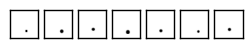

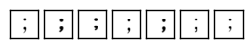

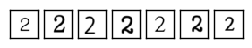

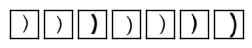

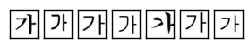

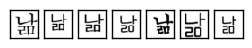

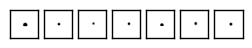

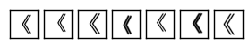

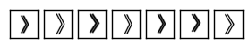

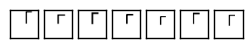

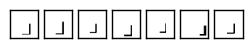

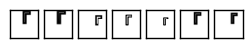

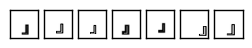

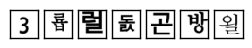

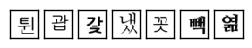

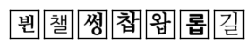

In [19]:
mat = dict()

sliced = [slice_img(get_mat(".")) for i in range(7)]
draw_subplot(sliced, 1, 7)

sliced = [slice_img(get_mat(";")) for i in range(7)]
draw_subplot(sliced, 1, 7)

sliced = [slice_img(get_mat("2")) for i in range(7)]
draw_subplot(sliced, 1, 7)

sliced = [slice_img(get_mat(")")) for i in range(7)]
draw_subplot(sliced, 1, 7)

sliced = [slice_img(get_mat("가")) for i in range(7)]
draw_subplot(sliced, 1, 7)

sliced = [slice_img(get_mat("낢")) for i in range(7)]
draw_subplot(sliced, 1, 7)

sliced = [slice_img(get_mat("·")) for i in range(7)]
draw_subplot(sliced, 1, 7)

sliced = [slice_img(get_mat("《")) for i in range(7)]
draw_subplot(sliced, 1, 7)

sliced = [slice_img(get_mat("》")) for i in range(7)]
draw_subplot(sliced, 1, 7)

sliced = [slice_img(get_mat("「")) for i in range(7)]
draw_subplot(sliced, 1, 7)

sliced = [slice_img(get_mat("」")) for i in range(7)]
draw_subplot(sliced, 1, 7)

sliced = [slice_img(get_mat("『")) for i in range(7)]
draw_subplot(sliced, 1, 7)

sliced = [slice_img(get_mat("』")) for i in range(7)]
draw_subplot(sliced, 1, 7)

sliced = [slice_img(get_mat(get_random_ch())) for i in range(7)]
draw_subplot(sliced, 1, 7)

sliced = [slice_img(get_mat(get_random_ch())) for i in range(7)]
draw_subplot(sliced, 1, 7)

sliced = [slice_img(get_mat(get_random_ch())) for i in range(7)]
draw_subplot(sliced, 1, 7)

In [20]:
def save_chset_random(chsets, chws, path, num):
    print ("saving into %s..." % path)
    index_data = []

    tar = tarfile.open(path, "w|gz")
    
    chw_sum = 0
    chws = list(chws)
    for i in range(len(chws)):
        chw_sum += chws[i]
        chws[i] = chw_sum
    
    for i in range(num):
        while True:
            font = random.choice(fonts)
            weight = random.choice(weights)
            if font != "Gungsuh" or weight != "BOLD":
                break
                
        ch_ran = random.uniform(0, chw_sum)
        for i, chset in enumerate(chsets):
            if (ch_ran < chws[i]):
                ch = random.choice(chset)
                break
            
        if len(index_data) % 10000 == 0:
            print ("saving %7dth data...\r" % (len(index_data)+1))
        pathname = "%07d.png" % len(index_data)
        sliced = slice_img(get_mat(ch, font, weight))
        ft = io.BytesIO()
        Image.fromarray(sliced, mode='L').save(ft, format="PNG", optimize=True, compress_level=9)
        index_data.append({'path': pathname, 'font': font, 'weight': weight, 'target': ch})
        ti = tarfile.TarInfo(pathname)
        ti.size = ft.getbuffer().nbytes
        if ti.size < 1 :
            print("Error: size too small")
            print(ft)
            ft.close()
        ft.seek(0)
        tar.addfile(ti, ft)
        ft.close()
    
    ti = tarfile.TarInfo("index.json")
    ft = io.BytesIO()
    ft_str = io.TextIOWrapper(ft)
    json.dump(index_data, ft_str, indent=4, sort_keys=True, separators=(',', ':'))
    ft_str.flush()
    ft.seek(0,2)
    ti.size = ft.tell()
    ft.seek(0)
    tar.addfile(ti, ft)
    ft.close()

    tar.close()
    print ("done")

NanumMyeongjo
NanumGothic
Gungsuh
Batang
Dotum
SM SSMyungJo Std
Gulim
NanumGothicCoding


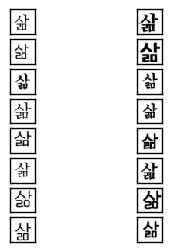

In [21]:
import itertools
import json


def show_example(ch, fonts, weights):
    sliced = []
    for font in fonts:
        print(font)
    for font, weight in itertools.product(fonts, weights):
        sliced.append(slice_img(get_mat(ch, font, weight)))
    draw_subplot(sliced, math.ceil(len(sliced)/2), 2)

mat = dict()
show_example("삶", fonts, weights)

In [22]:
mat = dict()
save_chset_random((en_chset, ko_chset), (1, 3), "data/161020.tgz", 300000)

saving into data/161020.tgz...
saving       1th data...
saving   10001th data...
saving   20001th data...
saving   30001th data...
saving   40001th data...
saving   50001th data...
saving   60001th data...
saving   70001th data...
saving   80001th data...
saving   90001th data...
saving  100001th data...
saving  110001th data...
saving  120001th data...
saving  130001th data...
saving  140001th data...
saving  150001th data...
saving  160001th data...
saving  170001th data...
saving  180001th data...
saving  190001th data...
saving  200001th data...
saving  210001th data...
saving  220001th data...
saving  230001th data...
saving  240001th data...
saving  250001th data...
saving  260001th data...
saving  270001th data...
saving  280001th data...
saving  290001th data...
done
